In [1]:
# Check PyTorch version installed on this system
!python -c "import torch; print(torch.__version__)"

1.13.0+cu116


In [2]:
!nvidia-smi

Thu Dec 15 01:20:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Download the required modules
"""
Assign to TORCH with what you get from the cell above, E.g., export TORCH=1.13.0+cu116
"""
%env TORCH=1.13.0+cu116
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-geometric
!pip install torchmetrics
!pip install matplotlib
!pip install networkx
!pip install scipy

env: TORCH=1.13.0+cu116
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 9.4 MB 14.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 4.6 MB 24.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 37.0 MB/s 
     |████████████████████████████████| 280 kB 78.0 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=a06a7a2134161f7a1a5780e9f1c8c793f251a4d7a5fe79ff8731f9bc4fa31ccd
  Stored in directory: /root/.cache/pip/wheels/59/a3/20/198928106d3169865ae73afcbd3d3d1796cf6b429b55c65378
Successfully built torch-geometric
  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 36.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
github_username=""
github_repository="grl"
github_token = ""

%env github_repository={github_repository}

env: github_repository=grl


In [5]:
!git clone https://{github_token}@github.com/{github_username}/{github_repository}.git

Cloning into 'grl'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 28 (delta 5), reused 24 (delta 4), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [6]:
%cd $github_repository

/content/grl


In [7]:
import torch
import random

random.seed(0)
torch.manual_seed(0)

In [8]:
from torch_geometric.datasets import PPI
from torch_geometric.loader import DataLoader
from torch_geometric.transforms import AddSelfLoops
import dataset

train_dataset = PPI(root='', split='train', transform=AddSelfLoops())
val_dataset = PPI(root='', split='val', transform=AddSelfLoops())
test_dataset = PPI(root='', split='test', transform=AddSelfLoops())

dataset.num_features = 50
dataset.num_labels = 121
dataset.train_loader = DataLoader(train_dataset, batch_size=2)
dataset.val_loader = DataLoader(val_dataset, batch_size=2)
dataset.test_loader = DataLoader(test_dataset, batch_size=2)

Extracting ./ppi.zip
Processing...
Done!


In [9]:
from evaluation import evaluate
from training_loop import train

In [10]:
from models import GATv1PPI
model = GATv1PPI(dataset.num_features, dataset.num_labels)
evaluate(model, dataset.test_loader)

(tensor(0.7062, device='cuda:0'), tensor(0.3849, device='cuda:0'))

In [11]:
ppi_train_params = {
  "lr": 5e-3,
  "weight_decay": 0,
  "epochs": 400,
  "patience": 100,
  "model_name": model.model_name
}

In [12]:
best_model, _, _, _, _, model_saver = train(model, ppi_train_params)
best_model = model
model_saver.download_best_model_state()

training model GATv1PPI
GATv1PPI(
  (layers): ModuleList(
    (0): GATLayer()
    (1): GATLayer()
    (2): GATLayer(
      (act): Identity()
    )
  )
)
training...
epoch 00000
	train_loss: 0.7257 | train_micro_f1: 0.4291
	val_loss: 0.5745 | val_micro_f1: 0.4004
epoch 00001
	train_loss: 0.5554 | train_micro_f1: 0.4628
	val_loss: 0.5160 | val_micro_f1: 0.4577
epoch 00002
	train_loss: 0.5193 | train_micro_f1: 0.4950
	val_loss: 0.5008 | val_micro_f1: 0.4926
epoch 00003
	train_loss: 0.5090 | train_micro_f1: 0.5198
	val_loss: 0.4935 | val_micro_f1: 0.4769
epoch 00004
	train_loss: 0.4998 | train_micro_f1: 0.5242
	val_loss: 0.4896 | val_micro_f1: 0.5447
epoch 00005
	train_loss: 0.4905 | train_micro_f1: 0.5425
	val_loss: 0.4805 | val_micro_f1: 0.5414
epoch 00006
	train_loss: 0.4810 | train_micro_f1: 0.5609
	val_loss: 0.4724 | val_micro_f1: 0.5490
epoch 00007
	train_loss: 0.4720 | train_micro_f1: 0.5737
	val_loss: 0.4705 | val_micro_f1: 0.5832
epoch 00008
	train_loss: 0.4654 | train_micro_f1: 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
from torch_geometric.utils import to_networkx

[test_graph] = list(dataset.test_loader)
test_graph_nx = to_networkx(test_graph)

print(test_graph)
print(test_graph_nx)

DataBatch(x=[5524, 50], edge_index=[2, 167500], y=[5524, 121], batch=[5524], ptr=[3])
DiGraph with 5524 nodes and 167500 edges


In [14]:
from attention_entropy_visualisation import visualise_attention_entropy, AttentionVisualisationMode

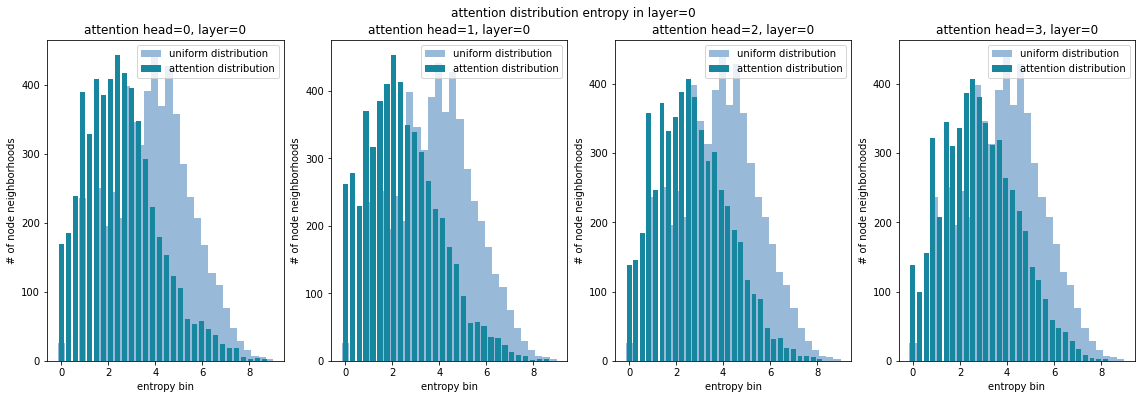

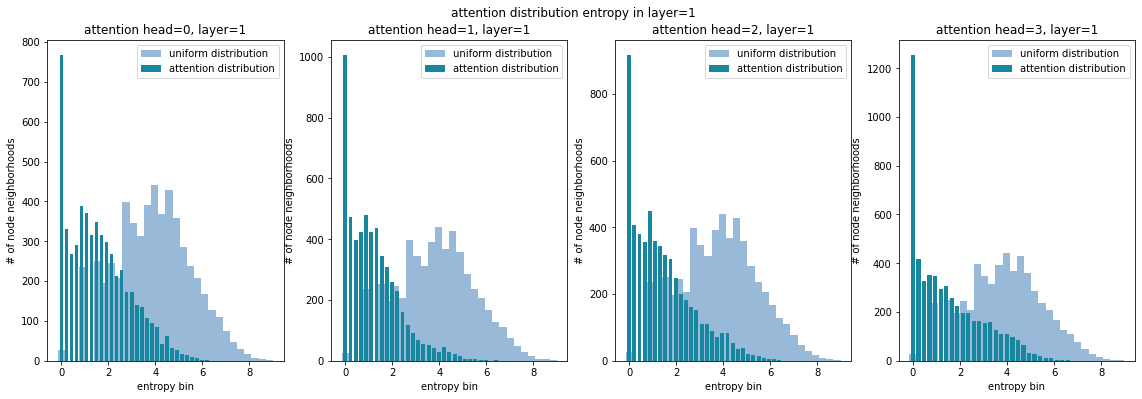

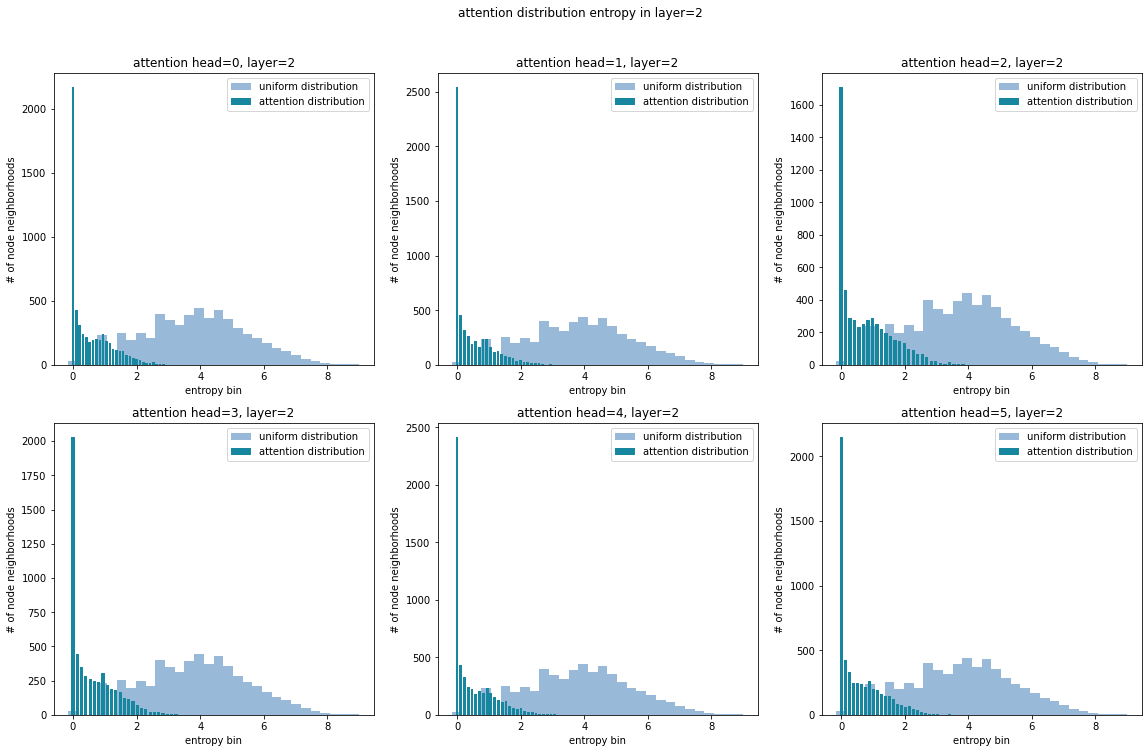

In [15]:
visualise_attention_entropy(best_model, test_graph, [4,4,6], AttentionVisualisationMode.PER_LAYER)

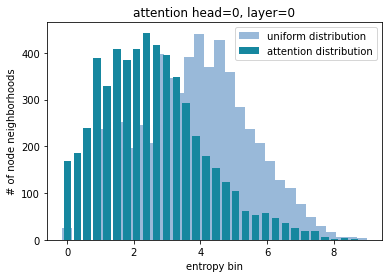

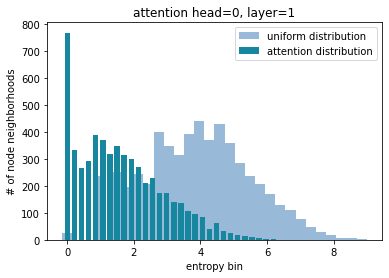

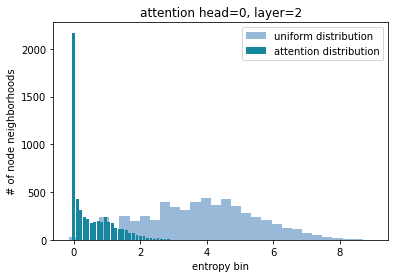

In [16]:
visualise_attention_entropy(best_model, test_graph, [1,1,1], AttentionVisualisationMode.PER_HEAD)

In [17]:
from node_degree_analysis import print_nodes_with_degs
from neighbourhood_analysis_visualisation import visualise_neighbourhoods_for, NeighbourhoodVisualisationMode

In [18]:
print_nodes_with_degs(test_graph_nx)

(853, 355)
(3946, 305)
(2210, 285)
(489, 270)
(1130, 245)
(4454, 235)
(857, 230)
(2184, 225)
(4750, 220)
(1829, 210)
(2308, 200)
(1994, 195)
(1026, 185)
(1269, 180)
(2233, 175)
(1993, 170)
(1030, 165)
(1990, 160)
(237, 155)
(3839, 150)
(209, 145)
(4847, 140)
(2798, 135)
(213, 130)
(377, 125)
(2715, 120)
(367, 115)
(1012, 110)
(2739, 105)
(342, 100)
(850, 95)
(2108, 90)
(217, 85)
(12, 80)
(423, 75)
(236, 70)
(1303, 65)
(458, 60)
(1456, 55)
(214, 50)
(14, 45)
(47, 40)
(86, 35)
(258, 30)
(2, 25)
(0, 20)
(30, 15)
(106, 10)
(29, 5)


In [19]:
nodes_to_visualise = [29, 106, 30, 0]

neighbourhood stats for node=29: 
	max attention: 0.8952, min attention: 0.0024
neighbourhood stats for node=106: 
	max attention: 0.8615, min attention: 0.0020
neighbourhood stats for node=30: 
	max attention: 0.3619, min attention: 0.0001
neighbourhood stats for node=0: 
	max attention: 0.4776, min attention: 0.0007


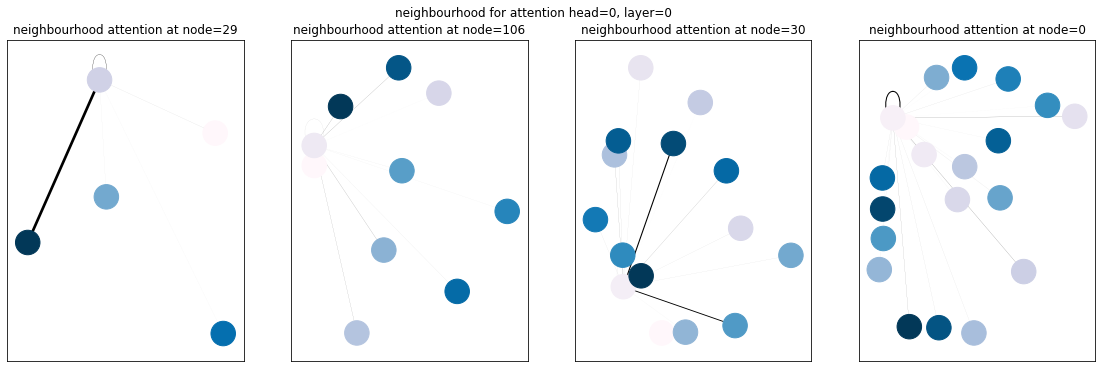

In [43]:
visualise_neighbourhoods_for(best_model, test_graph, 0, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.9980, min attention: 0.0000
neighbourhood stats for node=106: 
	max attention: 0.9064, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.2495, min attention: 0.0053
neighbourhood stats for node=0: 
	max attention: 0.8104, min attention: 0.0000


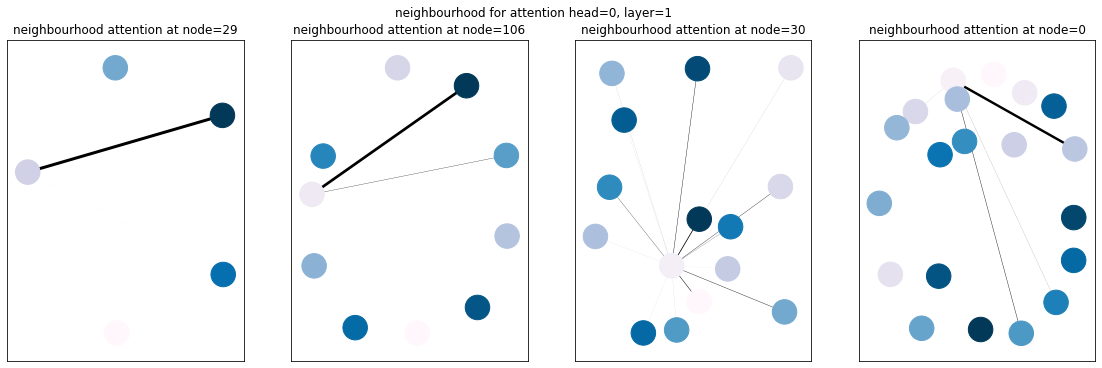

In [28]:
visualise_neighbourhoods_for(best_model, test_graph, 1, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.8427, min attention: 0.0011
neighbourhood stats for node=106: 
	max attention: 0.8387, min attention: 0.0005
neighbourhood stats for node=30: 
	max attention: 0.9975, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.9952, min attention: 0.0000


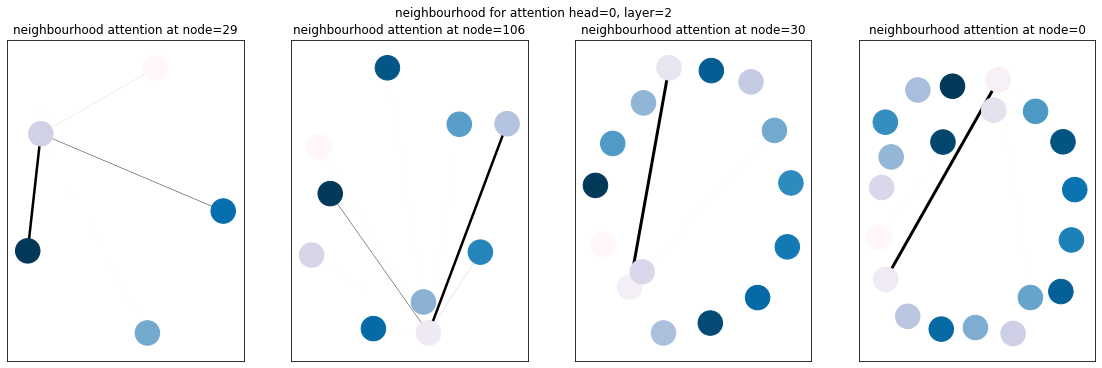

In [29]:
visualise_neighbourhoods_for(best_model, test_graph, 2, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.8952, min attention: 0.0024
neighbourhood stats for node=106: 
	max attention: 0.8615, min attention: 0.0020
neighbourhood stats for node=30: 
	max attention: 0.3619, min attention: 0.0001
neighbourhood stats for node=0: 
	max attention: 0.4776, min attention: 0.0007


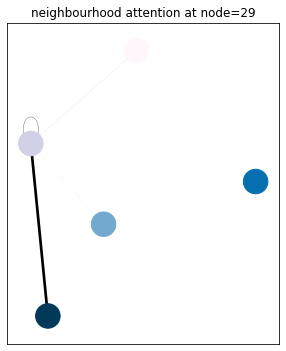

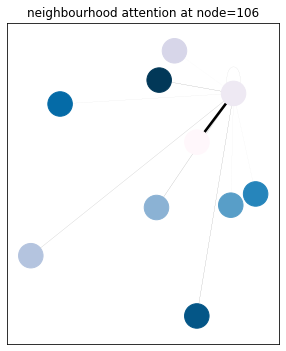

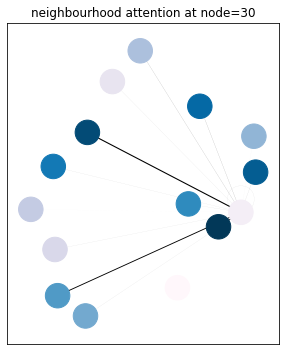

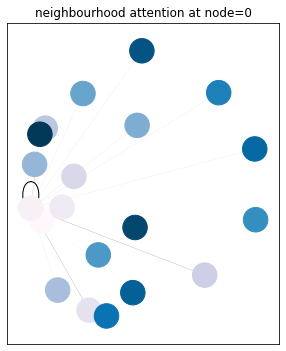

In [31]:
visualise_neighbourhoods_for(best_model, test_graph, 0, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_NODE)

neighbourhood stats for node=29: 
	max attention: 0.9980, min attention: 0.0000
neighbourhood stats for node=106: 
	max attention: 0.9064, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.2495, min attention: 0.0053
neighbourhood stats for node=0: 
	max attention: 0.8104, min attention: 0.0000


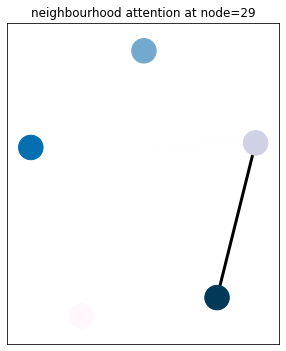

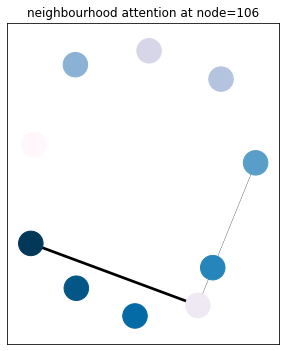

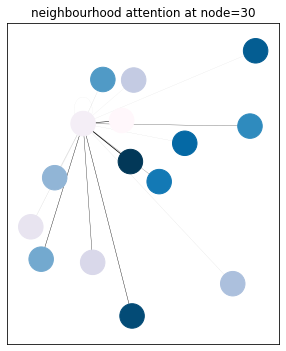

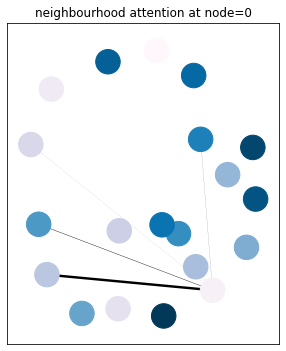

In [38]:
visualise_neighbourhoods_for(best_model, test_graph, 1, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_NODE)

neighbourhood stats for node=29: 
	max attention: 0.8427, min attention: 0.0011
neighbourhood stats for node=106: 
	max attention: 0.8387, min attention: 0.0005
neighbourhood stats for node=30: 
	max attention: 0.9975, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.9952, min attention: 0.0000


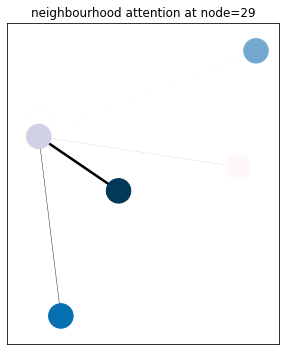

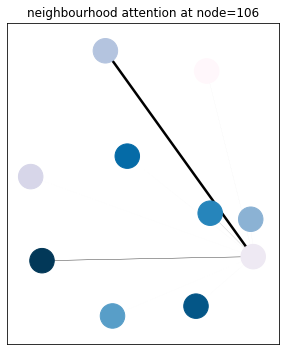

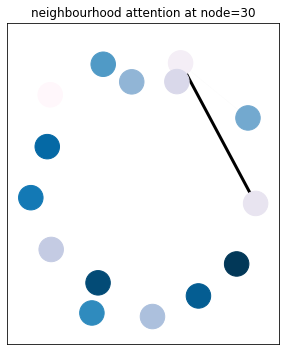

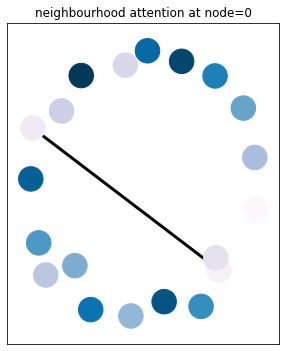

In [44]:
visualise_neighbourhoods_for(best_model, test_graph, 2, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_NODE)